<a href="https://colab.research.google.com/github/jmalonso55/paineira_mudas/blob/main/An%C3%A1lise_da_altura_Paineira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##############################################################################
# Modelo para ANOVA em DIC no R
## Dados de crescimento de mudas de paineira produzidas em diferentes recipientes
### Referência: Alonso, J. M., Abreu, A. H. M., Melo, L. A., Leles, P. S. S., Cabreira, G. V. (2018). Biosolids as substrate for the production of Ceiba speciosa seedlings. Cerne, 24, 420-429. https://doi.org/10.1590/01047760201824042568
##############################################################################

# 1. Preparando para as análises

In [28]:
# Instalando pacotes
install.packages("ExpDes.pt")
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
# Carregando pacotes
library(tidyverse)
library(ExpDes.pt)
library(ggthemes)

In [3]:
# Limpeza do histórico e da memória
rm(list=ls(all=TRUE)) # Remove dados carregados anteriormente
gc() # Limpa a memória

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,822915,44.0,1445650,77.3,1445650,77.3
Vcells,1490305,11.4,8388608,64.0,5533051,42.3


In [4]:
# Importa os dados de medição do repositório no GitHub
url_dados <- 'https://raw.githubusercontent.com/jmalonso55/paineira_mudas/main/Paineira.csv'

# Carrega o dataset por meio da url
dados <- read.csv(url_dados, sep = ";", stringsAsFactors = FALSE)


In [5]:
# Verificando os dados
summary(dados)


      Trat          Repet          Planta           ALT              DC       
 Min.   :1.00   Min.   :1.00   Min.   : 1.00   Min.   :11.50   Min.   :3.900  
 1st Qu.:1.75   1st Qu.:1.75   1st Qu.: 3.75   1st Qu.:22.88   1st Qu.:5.700  
 Median :2.50   Median :2.50   Median : 6.50   Median :27.50   Median :6.500  
 Mean   :2.50   Mean   :2.50   Mean   : 6.50   Mean   :28.46   Mean   :6.533  
 3rd Qu.:3.25   3rd Qu.:3.25   3rd Qu.: 9.25   3rd Qu.:34.00   3rd Qu.:7.325  
 Max.   :4.00   Max.   :4.00   Max.   :12.00   Max.   :47.50   Max.   :8.800  

In [6]:
# Transformando ALT e DC em vetores numéricos e Trat em fator
dados$ALT <- as.numeric(dados$ALT)
dados$DC <- as.numeric(dados$DC)
dados$Trat <- as.factor(dados$Trat)

# Fazendo a média das plantas dentro de cada repetição
dados_m <- aggregate(ALT ~ Repet + Trat, FUN = mean, data = dados)

# Visualizando
head(dados_m)

,Repet,Trat,ALT
,<int>,<fct>,<dbl>
1,1,1,19.58333
2,2,1,19.20833
3,3,1,19.37500
4,4,1,25.33333
5,1,2,28.20833
6,2,2,22.83333


In [7]:
# Função para verificar pressupostos e retornar a ANOVA
pressupostos <- function(y, x) {
  mod <- aov(y ~ x)
  norm <- shapiro.test(mod$residuals)
  hom <- bartlett.test(y ~ x)
  print(norm)
  print(hom)

  if (norm$p.value > 0.05 && hom$p.value > 0.05) {
    cat("\nResumo da ANOVA (Pressupostos atendidos):\n")
    print(summary(mod))
  } else {
    cat("Pressupostos não atendidos. Não foi possível realizar a ANOVA.\n")
  }
}

In [42]:
# Tema para os gráficos
tema <- theme(panel.background = element_rect(fill = "gray97"),
        panel.grid.major.x = element_line(color = "grey85", linetype = "dotted"),
        panel.grid.major.y = element_line(color = "grey85", linetype = "dotted"),
        strip.background = element_blank(),
        legend.position = "none",
        axis.title.y = element_text(margin = margin(r = 10)),
        axis.title.x = element_text(margin = margin(t = 10)),
        text = element_text(family = "serif", size = 18),
        axis.text = element_text(size = 14),
        strip.text = element_text(size = 16))


# 2. Análise do experimento

## 2.1. Para a altura

In [8]:
# Pressupostos da análise de variância
with(dados_m, pressupostos(ALT, Trat))


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.9767, p-value = 0.932


	Bartlett test of homogeneity of variances

data:  y by x
Bartlett's K-squared = 0.29586, df = 3, p-value = 0.9608


Resumo da ANOVA (Pressupostos atendidos):
            Df Sum Sq Mean Sq F value   Pr(>F)    
x            3  412.9  137.65    14.1 0.000308 ***
Residuals   12  117.2    9.76                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [9]:
# Utilizando o ExpDes.pt para a análise completa com teste de comparações múltiplas
with(dados_m, dic(Trat, ALT))

------------------------------------------------------------------------
Quadro da analise de variancia
------------------------------------------------------------------------
           GL     SQ      QM     Fc      Pr>Fc
Tratamento  3 412.95 137.649 14.098 0.00030769
Residuo    12 117.16   9.763                  
Total      15 530.11                          
------------------------------------------------------------------------
CV = 10.98 %

------------------------------------------------------------------------
Teste de normalidade dos residuos ( Shapiro-Wilk ) 
Valor-p:  0.93197 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
------------------------------------------------------------------------

------------------------------------------------------------------------
Teste de homogeneidade de variancia 
valor-p:  0.9608058 
De acordo com o teste de bartlett a 5% de significancia, as variancias podem ser consideradas 

In [10]:
# ANOVA mais teste de Scott-Knott para eliminar ambiguidades
with(dados_m, dic(Trat, ALT, mcomp = "sk"))

------------------------------------------------------------------------
Quadro da analise de variancia
------------------------------------------------------------------------
           GL     SQ      QM     Fc      Pr>Fc
Tratamento  3 412.95 137.649 14.098 0.00030769
Residuo    12 117.16   9.763                  
Total      15 530.11                          
------------------------------------------------------------------------
CV = 10.98 %

------------------------------------------------------------------------
Teste de normalidade dos residuos ( Shapiro-Wilk ) 
Valor-p:  0.93197 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
------------------------------------------------------------------------

------------------------------------------------------------------------
Teste de homogeneidade de variancia 
valor-p:  0.9608058 
De acordo com o teste de bartlett a 5% de significancia, as variancias podem ser consideradas 

## 2.2. Para o diâmetro

In [11]:
# Fazendo a média das plantas dentro de cada repetição
dados_m2 <- aggregate(DC ~ Repet + Trat, FUN = mean, data = dados)

In [12]:
# Testando os pressupostos
with(dados_m2, pressupostos(DC, Trat))


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.94488, p-value = 0.4131


	Bartlett test of homogeneity of variances

data:  y by x
Bartlett's K-squared = 6.5707, df = 3, p-value = 0.08692


Resumo da ANOVA (Pressupostos atendidos):
            Df Sum Sq Mean Sq F value  Pr(>F)   
x            3  7.712  2.5708   8.748 0.00239 **
Residuals   12  3.527  0.2939                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [13]:
# ANOVA mais teste de Scott-Knott
with(dados_m2, dic(Trat, DC, mcomp = "sk"))

------------------------------------------------------------------------
Quadro da analise de variancia
------------------------------------------------------------------------
           GL      SQ      QM     Fc     Pr>Fc
Tratamento  3  7.7124 2.57081 8.7477 0.0023924
Residuo    12  3.5266 0.29388                 
Total      15 11.2390                         
------------------------------------------------------------------------
CV = 8.3 %

------------------------------------------------------------------------
Teste de normalidade dos residuos ( Shapiro-Wilk ) 
Valor-p:  0.4131213 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
------------------------------------------------------------------------

------------------------------------------------------------------------
Teste de homogeneidade de variancia 
valor-p:  0.08691691 
De acordo com o teste de bartlett a 5% de significancia, as variancias podem ser consideradas

# 3. Apresentação gráfica dos resultados

In [18]:
# Adicionando resultados do teste e unindo as duas tabelas
dados_g <- merge(dados_m, dados_m2, by = c("Repet", "Trat"))

# Resultados do Scott-Knott para altura
dados_g <- dados_g %>%
  mutate(teste_alt = case_when(
    Trat == "1" ~ "c",
    Trat == "2" ~ "b",
    Trat == "3" ~ "a",
    Trat == "4" ~ "a")
  )

# Resultados do Scott-Knott para diâmetro
dados_g <- dados_g %>%
  mutate(teste_dia = case_when(
    Trat == "1" ~ "b",
    Trat == "2" ~ "b",
    Trat == "3" ~ "a",
    Trat == "4" ~ "a")
  )

# Verificando
head(dados_g)

,Repet,Trat,ALT,DC,teste_alt,teste_dia
,<int>,<fct>,<dbl>,<dbl>,<chr>,<chr>
1,1,1,19.58333,5.216667,c,b
2,1,2,28.20833,6.316667,b,b
3,1,3,33.75000,7.600000,a,a
4,1,4,34.62500,7.141667,a,a
5,2,1,19.20833,5.333333,c,b
6,2,2,22.83333,6.075000,b,b


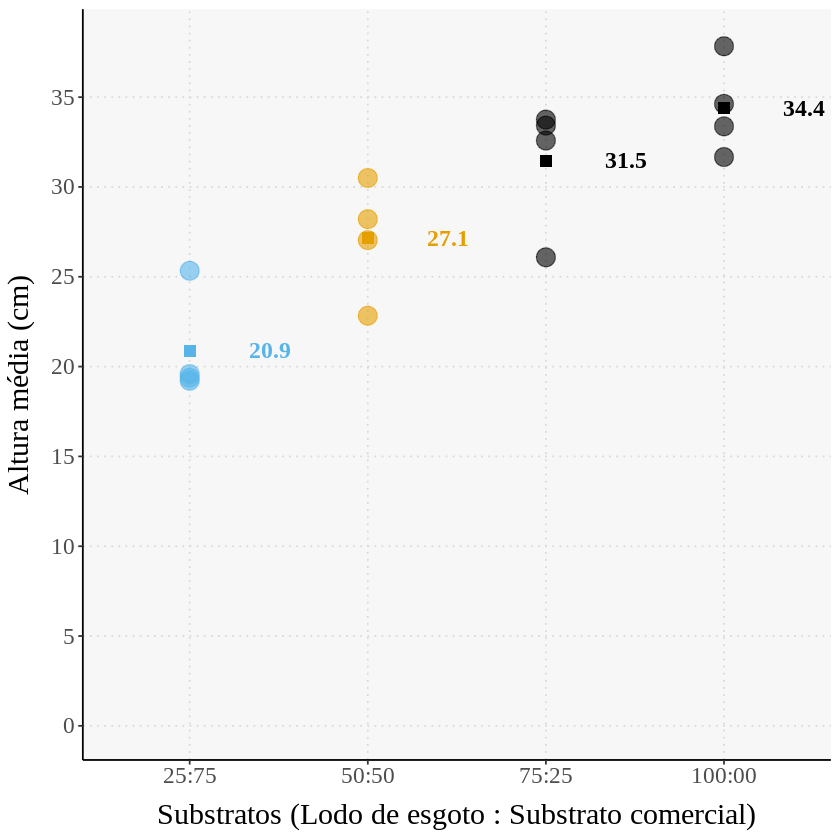

In [43]:
# Gráfico para a altura
ggplot(data = dados_g, aes(x = Trat, y = ALT, color = teste_alt)) +
  geom_point(alpha = 0.6, size = 5) +
  stat_summary(fun = mean, geom = "point", size = 3, shape = 15) +
  stat_summary(fun = mean, geom = "text", aes(label = sprintf("%.1f", after_stat(y))), position = position_nudge(x = 0.45), family = "serif", fontface = "bold", size = 5) +
  scale_color_colorblind(guide = "none") +
  scale_x_discrete(labels = c("25:75", "50:50", "75:25", "100:00")) +
  scale_y_continuous(breaks = c(0, 5, 10, 15, 20, 25, 30, 35), limits = c(0, 38)) +
  labs(y="Altura média (cm)", x="Substratos (Lodo de esgoto : Substrato comercial)") +
  theme_classic() +
  tema

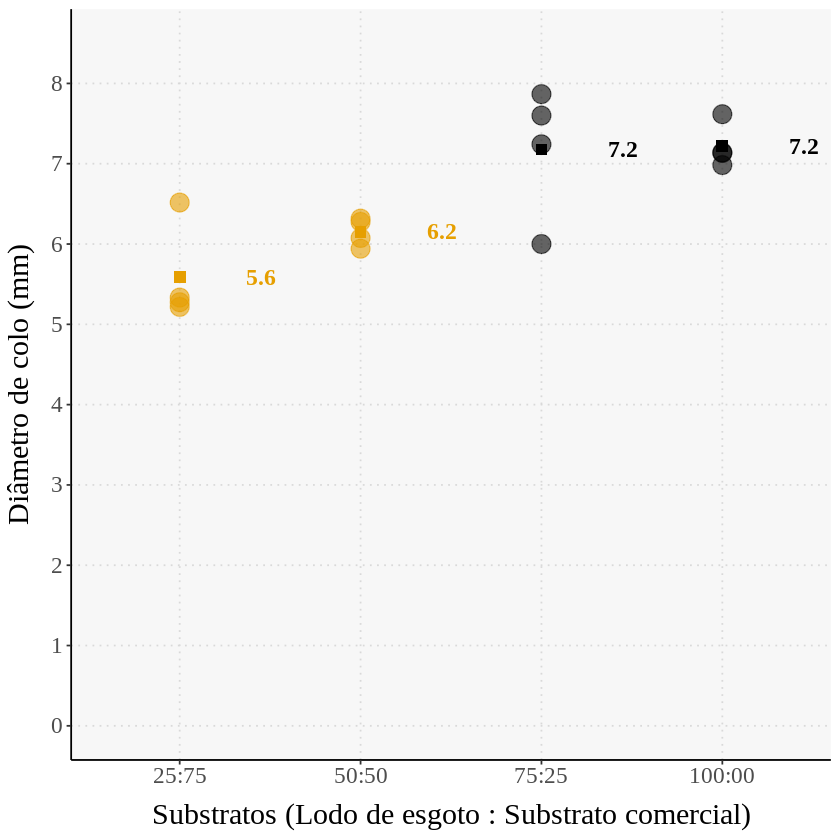

In [46]:
# Gráfico para o diâmetro
ggplot(data = dados_g, aes(x = Trat, y = DC, color = teste_dia)) +
  geom_point(alpha = 0.6, size = 5) +
  stat_summary(fun = mean, geom = "point", size = 3, shape = 15) +
  stat_summary(fun = mean, geom = "text", aes(label = sprintf("%.1f", after_stat(y))), position = position_nudge(x = 0.45), family = "serif", fontface = "bold", size = 5) +
  scale_color_colorblind(guide = "none") +
  scale_x_discrete(labels = c("25:75", "50:50", "75:25", "100:00")) +
  scale_y_continuous(breaks = c(0, 1, 2, 3, 4, 5, 6, 7, 8), limits = c(0, 8.5)) +
  labs(y="Diâmetro de colo (mm)", x="Substratos (Lodo de esgoto : Substrato comercial)") +
  theme_classic() +
  tema